In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("model_input.csv", delimiter=";")
df.drop(['location'],axis=1,inplace=True)
df = df[df['lceq_avg'] != 0]
df.tail()

,month,day_month,day_week,hour,minute,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,...,LC_TEMP,avg_trucks,avg_cars,avg_bikes,avg_pedestrians,v85,Telraam data,Weather data,lceq_avg,lcpeak_avg
52555,12,31,6,23,10,53,7.06,38,0,0.0,...,16.63219,0.0,0.0,0.0,0.0,0.0,0,1,61.6704,74.5478
52556,12,31,6,23,20,53,6.97,37,0,0.0,...,16.61295,0.0,0.0,0.0,0.0,0.0,0,1,63.0117,76.6934
52557,12,31,6,23,30,53,6.99,38,0,0.0,...,16.53810,0.0,0.0,0.0,0.0,0.0,0,1,63.7770,77.4834
52558,12,31,6,23,40,53,6.82,37,0,0.0,...,16.39468,0.0,0.0,0.0,0.0,0.0,0,1,66.1730,80.3168
52559,12,31,6,23,50,53,6.75,38,0,0.0,...,16.26945,0.0,0.0,0.0,0.0,0.0,0,1,63.2617,76.8943


In [3]:
# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(df.drop(['lceq_avg','lcpeak_avg'],axis=1), df['lceq_avg'], test_size=0.2, random_state=40)

## MLP Classifier

In [24]:
# # Convert y_train and y_test to integers
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
# mlp.fit(x_train,y_train)

# rounded_predictions = mlp.predict(x_test).round().astype(int)

# print(confusion_matrix(y_test, rounded_predictions))
# print(classification_report(y_test,rounded_predictions))
# print(r2_score(y_test, rounded_predictions))

# MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30))
mlp.fit(x_train,y_train)

print("r2_score: ", r2_score(y_test, mlp.predict(x_test)))



r2_score:  0.7618968669344361


C:\Users\jadoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## CatBoost (High performance Gradient Boosting)

In [4]:
# CatBoost Regressor
model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R-squared score on test data: {:.2f}".format(model.score(x_test, y_test)))
# other metrics
print("Mean squared error on test data: {:.2f}".format(np.mean((y_pred - y_test)**2)))

0:	learn: 5.4847360	total: 157ms	remaining: 5m 14s
1:	learn: 5.2981341	total: 163ms	remaining: 2m 43s
2:	learn: 5.1200237	total: 171ms	remaining: 1m 53s
3:	learn: 4.9564412	total: 178ms	remaining: 1m 28s
4:	learn: 4.8044033	total: 188ms	remaining: 1m 14s
5:	learn: 4.6580154	total: 198ms	remaining: 1m 5s
6:	learn: 4.5217534	total: 207ms	remaining: 58.8s
7:	learn: 4.3933705	total: 213ms	remaining: 52.9s
8:	learn: 4.2773854	total: 234ms	remaining: 51.7s
9:	learn: 4.1677556	total: 240ms	remaining: 47.8s
10:	learn: 4.0599470	total: 247ms	remaining: 44.7s
11:	learn: 3.9662854	total: 254ms	remaining: 42.1s
12:	learn: 3.8733065	total: 261ms	remaining: 39.9s
13:	learn: 3.7862440	total: 271ms	remaining: 38.4s
14:	learn: 3.7093923	total: 279ms	remaining: 36.9s
15:	learn: 3.6411933	total: 287ms	remaining: 35.5s
16:	learn: 3.5702376	total: 292ms	remaining: 34.1s
17:	learn: 3.5063771	total: 301ms	remaining: 33.1s
18:	learn: 3.4512998	total: 308ms	remaining: 32.2s
19:	learn: 3.3975909	total: 315ms	re

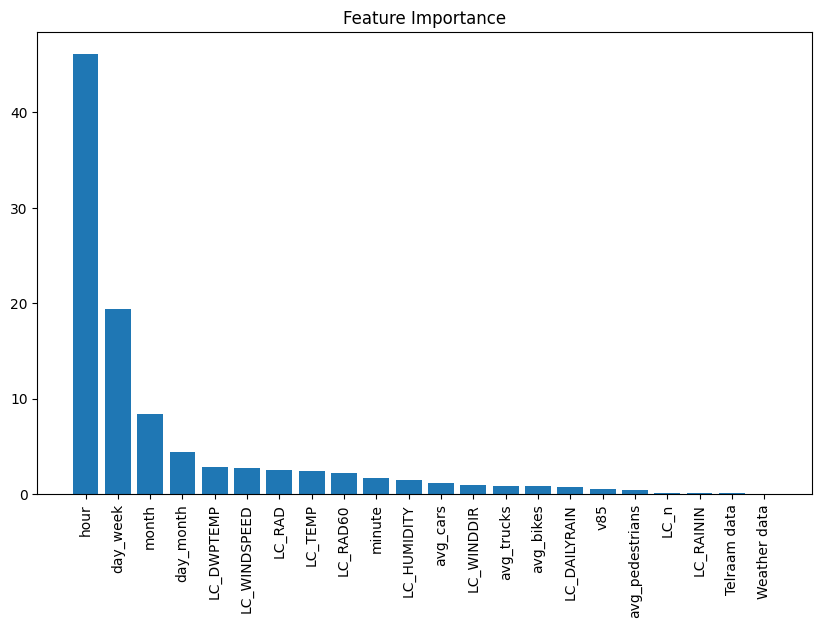

In [6]:
# Get important features graph
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [df.columns[i] for i in indices]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()



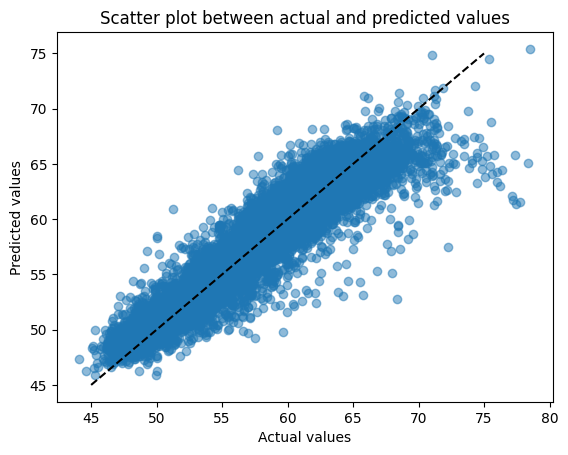

In [15]:
# Create a scatter plot with predicted and actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([45, 75], [45, 75], '--k')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatter plot between actual and predicted values")
plt.show()


## ADA Boost

In [12]:
# ADA Boost
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                            n_estimators=400, random_state=42)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("R-squared score on test data: {:.2f}".format(regr.score(x_test, y_test)))


R-squared score on test data: 0.74


## Naive Bayes

In [16]:
y_train_class = y_train.apply(lambda x: 1 if x>=50 else 0)
y_test_class = y_test.apply(lambda x: 1 if x>=50 else 0)

gnb = GaussianNB()
gnb.fit(x_train, y_train_class)

# make predictions and evaluate model performance
y_pred = gnb.predict(x_test)
print("R-squared score on test data: {:.2f}".format(gnb.score(x_test, y_test_class)))

R-squared score on test data: 0.80


## XGBoost (Extreme Gradient Boosting)

In [7]:
# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("R-squared score on test data: {:.2f}".format(xgb.score(x_test, y_test)))


R-squared score on test data: 0.87


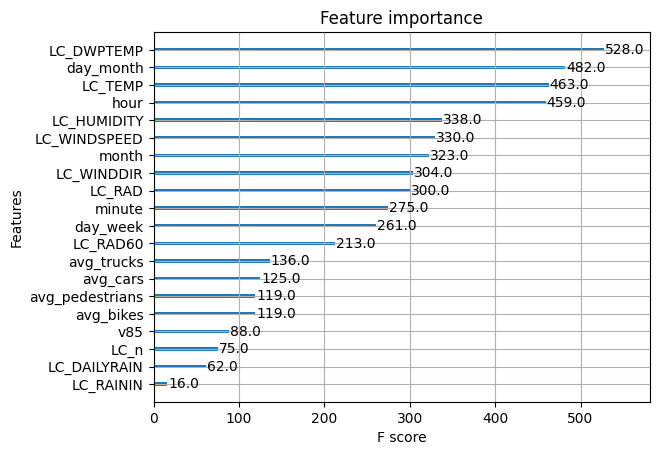

In [8]:
# Print graph of important features
plot_importance(xgb)
plt.show()

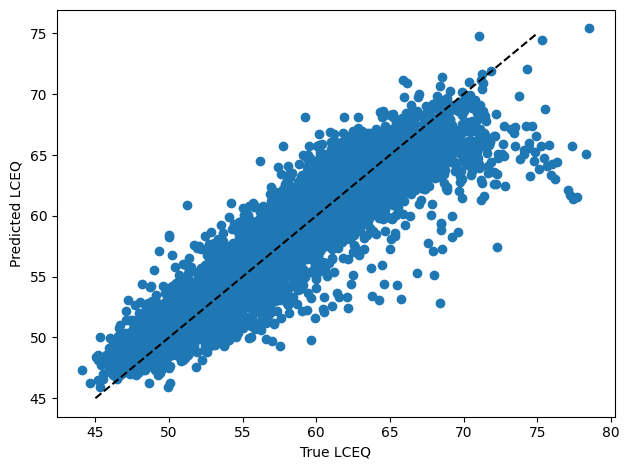

In [13]:
# Create a scatter plot with predicted and actual values, pull a straight line through the origin 
plt.scatter(y_test, y_pred)
plt.plot([45, 75], [45, 75], '--k')
plt.axis('tight')
plt.xlabel('True LCEQ')
plt.ylabel('Predicted LCEQ')
plt.tight_layout()
plt.show()

## K-Nearest Neighbor

In [18]:
# K nearest neighbors
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("R-squared score on test data: {:.2f}".format(knn.score(x_test, y_test)))


R-squared score on test data: 0.62
